In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from math import sqrt

In [102]:
df = pd.read_csv("NDVI_TimeSeries_MODIS (1).csv")

df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=True)
df.set_index('date', inplace = True)
print(df.iloc[1])
print()
print(df)

NDVI    0.367913
Name: 2000-03-05 00:00:00, dtype: float64

                NDVI
date                
2000-02-18  0.357012
2000-03-05  0.367913
2000-03-21  0.380757
2000-04-06  0.355394
2000-04-22  0.332275
...              ...
2020-10-15  0.432185
2020-10-31  0.401004
2020-11-16  0.319800
2020-12-02  0.393415
2020-12-18  0.354511

[480 rows x 1 columns]


In [103]:
ndvi_val = df.loc['2000-02-18']
print(ndvi_val)


NDVI    0.357012
Name: 2000-02-18 00:00:00, dtype: float64


In [104]:
data_2010 = df.loc['2010']
print(data_2010.head())


                NDVI
date                
2010-01-01  0.335536
2010-01-17  0.357667
2010-02-02  0.344072
2010-02-18  0.312738
2010-03-06  0.308300


In [109]:
summary = df.describe()
print(summary)


             NDVI
count  480.000000
mean     0.345496
std      0.044240
min      0.138755
25%      0.316745
50%      0.345142
75%      0.378796
max      0.444213


In [110]:
df['month'] = df.index.month
df['year'] = df.index.year
df['day_of_week'] = df.index.dayofweek

In [113]:
df['Lag1'] = df['NDVI'].shift(1)
df['Rolling_1'] = df['NDVI'].rolling(window=7).mean()
df['Expand_1'] = df['NDVI'].expanding().mean()

In [115]:
df

,NDVI,month,year,day_of_week,Lag1,Rolling_1,Expand_1
date,,,,,,,
2000-02-18,0.357012,2,2000,4,NaN,NaN,0.357012
2000-03-05,0.367913,3,2000,6,0.357012,NaN,0.362462
2000-03-21,0.380757,3,2000,1,0.367913,NaN,0.368561
2000-04-06,0.355394,4,2000,3,0.380757,NaN,0.365269
2000-04-22,0.332275,4,2000,5,0.355394,NaN,0.358670
...,...,...,...,...,...,...,...
2020-10-15,0.432185,10,2020,3,0.419678,0.390780,0.345314
2020-10-31,0.401004,10,2020,5,0.432185,0.393563,0.345431
2020-11-16,0.319800,11,2020,0,0.401004,0.383665,0.345377


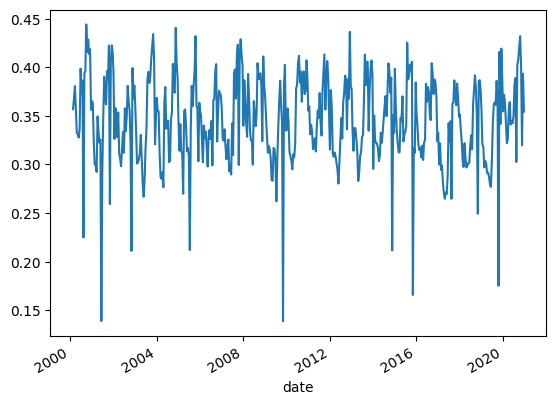

In [117]:
plt.figure()
df['NDVI'].plot()
plt.show()

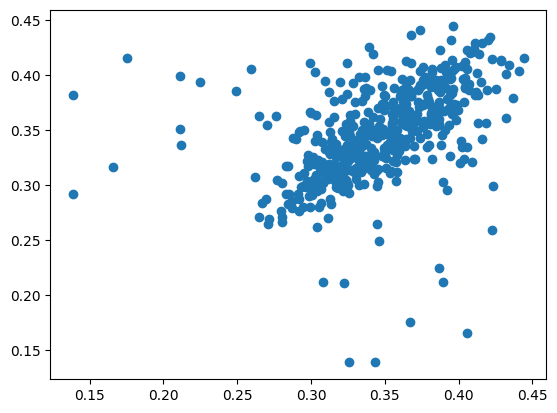

In [119]:
plt.figure()
plt.scatter(df['Lag1'],df['NDVI'])
plt.show()

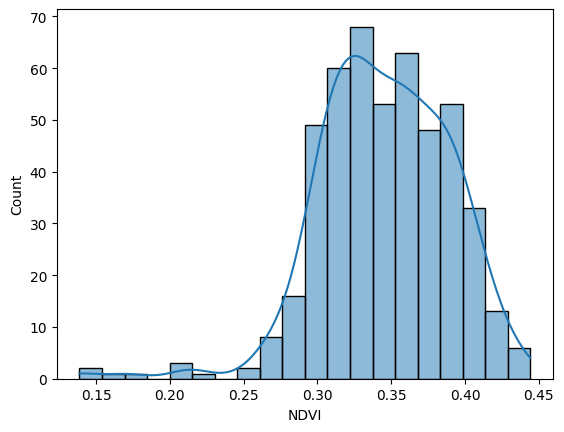

In [129]:
plt.figure()
sns.histplot(df['NDVI'], kde=True)
plt.show()

<Figure size 640x480 with 0 Axes>

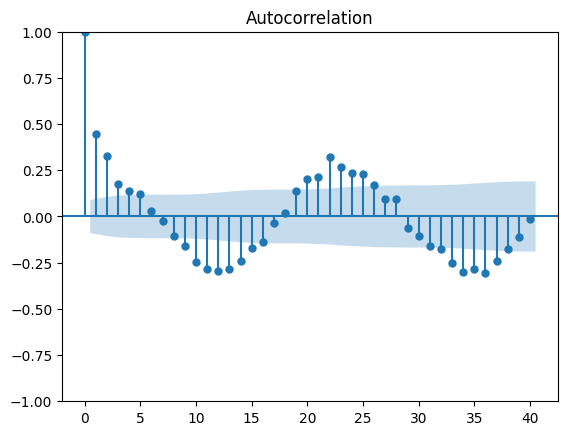

In [149]:
plt.figure()
plot_acf(df['NDVI'], lags=40)
plt.show()

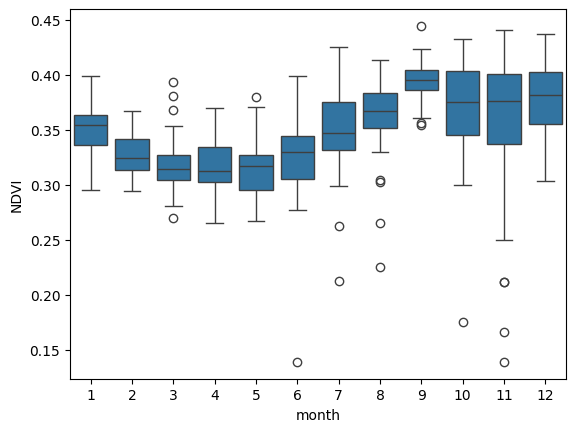

In [131]:
sns.boxplot(x='month',y='NDVI',data=df)
plt.show()

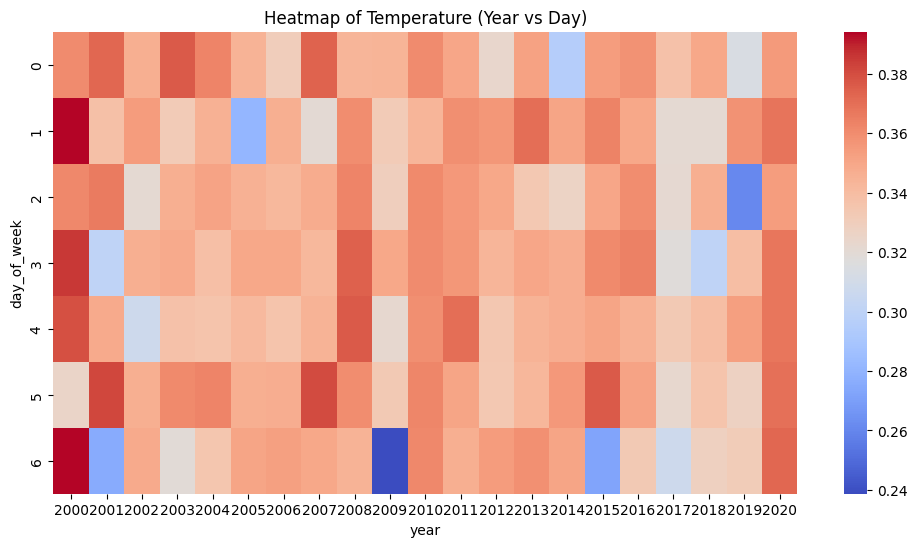

In [139]:
df['DayOfYear'] = df.index.dayofyear
pivot = df.pivot_table(index='day_of_week', columns='year', values='NDVI')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Heatmap of Temperature (Year vs Day)')
plt.show()


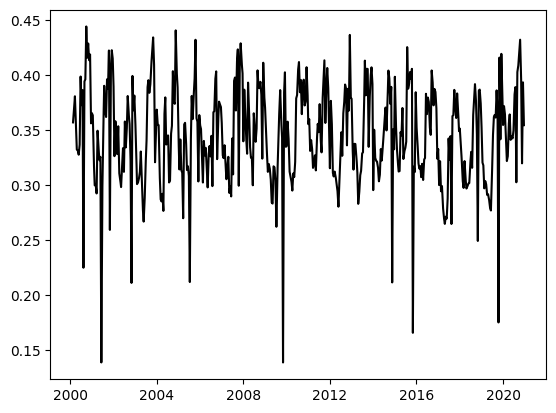

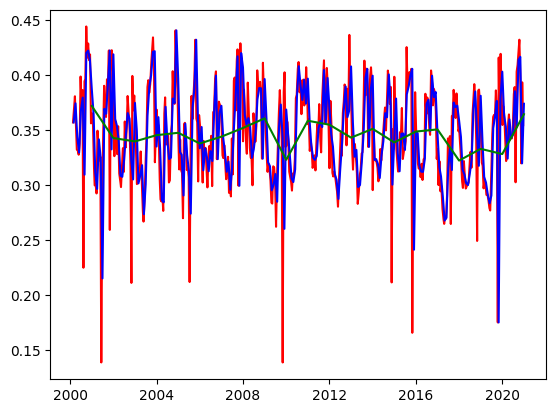

In [199]:
df_daily = df['NDVI'].resample('D').asfreq()

df_hourly = df['NDVI'].resample('h').asfreq()

interpolated_d = df_daily.interpolate(method='linear')

interpolated_h = df_hourly.interpolate(method='linear')

monthly_mean = df['NDVI'].resample('ME').mean()
annual_mean = df['NDVI'].resample('YE').mean()

plt.figure()
plt.plot(interpolated_d,color='black')

plt.figure()
plt.plot(interpolated_h,color='red')
plt.plot(monthly_mean,color='blue')
plt.plot(annual_mean,color='green')
plt.show()

In [163]:
result = adfuller(df['NDVI'])
result

(-5.400859639234169,
 3.373150403628012e-06,
 18,
 461,
 {'1%': -3.4446148284445153,
  '5%': -2.8678299626609314,
  '10%': -2.5701203107928157},
 -1709.2833724197212)

In [207]:
print(f'ADF Statistic : {result[0]}')
print()
print('If p-value < 0.05: Reject H0 → Stationarity achieved.')
print()
print('P-value : ',result[1])
print()
print('Critical Values: ', result[4])

ADF Statistic : -5.400859639234169

If p-value < 0.05: Reject H0 → Stationarity achieved.

P-value :  3.373150403628012e-06

Critical Values:  {'1%': -3.4446148284445153, '5%': -2.8678299626609314, '10%': -2.5701203107928157}


In [173]:
if result[1] > 0.05:
    df['NDVI_diff'] = df['NDVI'].diff()
    result_diff = adfuller(df['NDVI_diff'])
    print(f'ADF Statistic : {result[0]}')
    print('P-value : ',result[1])
    print('Critical Values: ', result[4])

<Figure size 640x480 with 0 Axes>

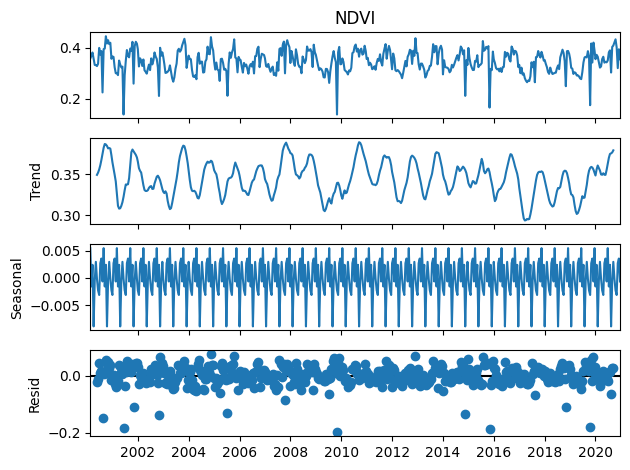

In [181]:
plt.figure()
decomposition = seasonal_decompose(df['NDVI'], period=12)  # Assuming yearly seasonality
decomposition.plot()
plt.show()

<Figure size 1200x400 with 0 Axes>

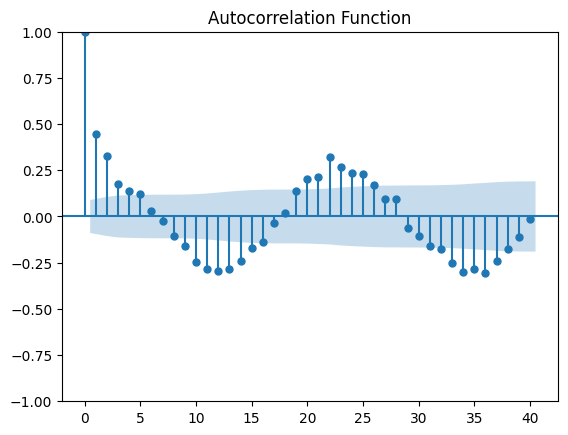

<Figure size 1200x400 with 0 Axes>

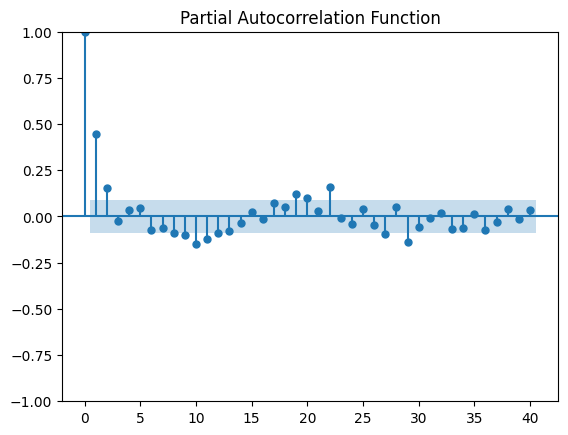

In [183]:
plt.figure(figsize=(12, 4))
plot_acf(df['NDVI'].dropna(), lags=40, title='Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 4))
plot_pacf(df['NDVI'].dropna(), lags=40, title='Partial Autocorrelation Function')
plt.show()

In [220]:
## 5. Modeling Preparation
print("\nPreparing for time series modeling...")

# Simple ARIMA model
from statsmodels.tsa.arima.model import ARIMA

# Fit SARIMA
model = ARIMA(
    df['NDVI'], 
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 23)  # 23 periods/year for 16-day data
)
results = model.fit()

forecast = results.forecast(steps=12)
print(forecast)


Preparing for time series modeling...


C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


480    0.354236
481    0.345640
482    0.334215
483    0.320478
484    0.319254
485    0.318223
486    0.320054
487    0.310103
488    0.312275
489    0.314148
490    0.314202
491    0.336991
Name: predicted_mean, dtype: float64


C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\maddu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Test RMSE: 0.047


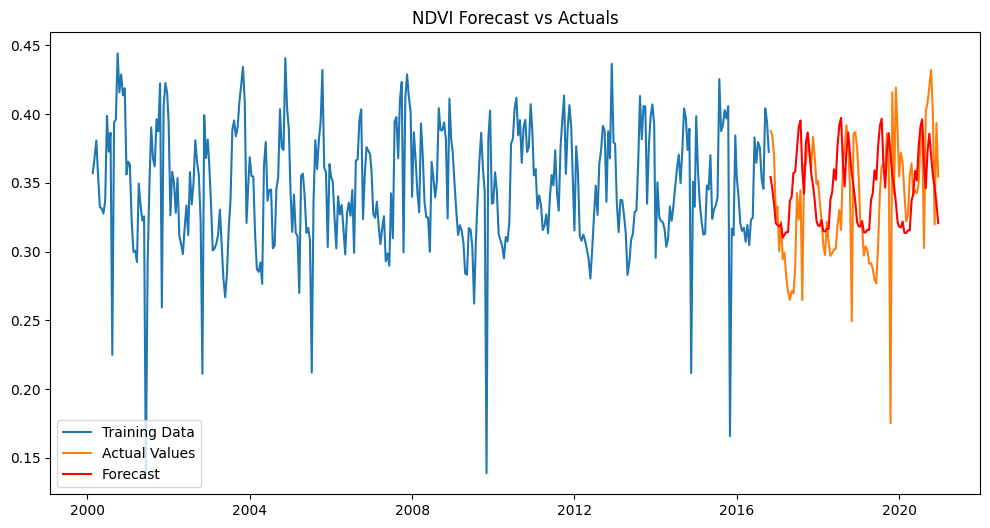

In [218]:

from sklearn.metrics import mean_squared_error
# Forecast
forecast = results.forecast(steps=len(test))
rmse = sqrt(mean_squared_error(test, forecast))
print(f'Test RMSE: {rmse:.3f}')

# Plot forecast
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Values')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('NDVI Forecast vs Actuals')
plt.legend()
plt.savefig('forecast_results.png', dpi=300)
plt.show()